In [1]:
from ortools.sat.python import cp_model

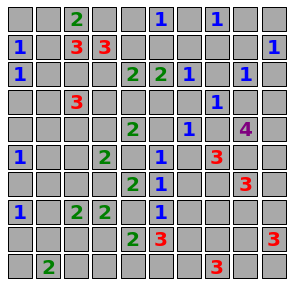

In [120]:
import matplotlib.pyplot as plt

rows = cols = 10

grid = [
[-1,-1,2,-1,-1,1,-1,1,-1,-1],
[1,-1,3,3,-1,-1,-1,-1,-1,1],   
[1,-1,-1,-1,2,2,1,-1,1,-1],
[-1,-1,3,-1,-1,-1,-1,1,-1,-1],
[-1,-1,-1,-1,2,-1,1,-1,4,-1,-1],
[1,-1,-1,2,-1,1,-1,3,-1,-1],  
[-1,-1,-1,-1,2,1,-1,-1,3,-1],
[1,-1,2,2,-1,1,-1,-1,-1,-1],  
[-1,-1,-1,-1,2,3,-1,-1,-1,3],
[-1,2,-1,-1,-1,-1,-1,3,-1,-1],  
]

colors = {
    1: 'blue',
    2: 'green',
    3: 'red',
    4: 'purple',
    5: 'yellow',
}

plt.figure(figsize=(5,5))
for i in range(rows):
    for j in range(cols):
        if grid[i][j] != -1:
            plt.scatter(j,cols-i-1, marker = 's', color = 'darkgrey', s = 600, edgecolors='k')
            plt.text(j-.25,cols-i-1-.25, grid[i][j], c = colors[grid[i][j]], \
                     fontsize = 20, fontweight = 'bold')
        else:
            plt.scatter(j,cols-i-1, marker = 's', color = 'darkgrey', s = 600, edgecolors='k')

plt.axis('off');

In [121]:
# Creates the model and set solver
model = cp_model.CpModel()
solver = cp_model.CpSolver()

x = {(i,j): model.NewBoolVar(f"x_{i}_{j}") for i in range(rows) for j in range(cols)}

# Coordinates of cells around a given cell, aka it's perimeter
perimeter = [(0,1),(0,-1),(-1,0),(-1,1),(-1,-1),(1,0),(1,-1),(1,1)]

# The sum of mines around each numbered spot on the grid (!=-1) is equal to that number
for i in range(rows):
    for j in range(cols):
        if grid[i][j] != -1:
            model.Add(sum(x[i+a,j+b] for (a,b) in perimeter \
                          if (i+a,j+b) in x.keys() and grid[i+a][j+b] == -1) == grid[i][j])

status = solver.Solve(model)

print(f"Status = {solver.StatusName(status)}")

Status = OPTIMAL


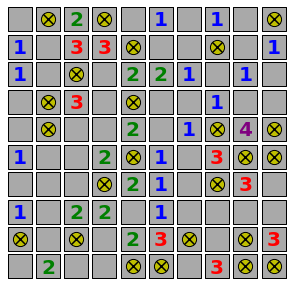

In [149]:
import numpy as np

# Tracking solution
sol = [solver.value(x[i,j]) for (i,j) in x.keys()]
sol = np.reshape(sol,(rows,cols))

# Plotting solution
plt.figure(figsize=(5,5))
for i in range(rows):
    for j in range(cols):
        if grid[i][j] != -1:
            plt.scatter(j,cols-i-1, marker = 's', color = 'darkgrey', s = 600, edgecolors='k')
            plt.text(j-.25,cols-i-1-.25, grid[i][j], c = colors[grid[i][j]], \
                     fontsize = 20, fontweight = 'bold')
        elif sol[i][j] == 1:
            plt.scatter(j,cols-i-1, marker = 's', color = 'darkgrey', s = 600, edgecolors='k')
            plt.scatter(j,cols-i-1, marker = 'o', color = 'y', s = 200, edgecolors='k')
            plt.scatter(j,cols-i-1, marker = 'x', color = 'k', s = 100)
        else:
            plt.scatter(j,cols-i-1, marker = 's', color = 'darkgrey', s = 600, edgecolors='k')

plt.axis('off');